1\. **Reductions**

Given the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

   1. find the total mean
   2. find the mean for each row and column

In [1]:
import numpy as np

In [2]:
m = np.arange(12).reshape((3,4))
flat = m.flatten()
tot_mean = np.mean(flat)
print("The array displayed on a single dimension is: ", flat)
print("The total mean is: ", tot_mean)
mean_i = [np.mean(m[i,:]) for i in range(m.shape[0])]
mean_j = [np.mean(m[:,j]) for j in range(m.shape[1])]
print("The mean for each row is: ", mean_i)
print("The mean for each column is: ", mean_j)

The array displayed on a single dimension is:  [ 0  1  2  3  4  5  6  7  8  9 10 11]
The total mean is:  5.5
The mean for each row is:  [1.5, 5.5, 9.5]
The mean for each column is:  [4.0, 5.0, 6.0, 7.0]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [3]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
out = np.outer(u,v,out=None)
mult = np.array([(i*j) for i in u for j in v])
mult = mult.reshape(4,4)
z = [[i] for i in u]
broad = z*v
print("Using outer function from numpy: \n", out, '\n\n', "Using nested function and reshaping: \n", mult, '\n\n', "Using broadcasting: \n", broad)

Using outer function from numpy: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

 Using nested function and reshaping: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

 Using broadcasting: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a $10 \times 6$ matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [4]:
#mat = np.array([np.random])
mat = 3*np.random.rand(10,6)
print("Matrix before masking: \n", mat, "\n\n")
mat[mat<0.3] = 0
print("Matrix after masking: \n", mat)

Matrix before masking: 
 [[2.76252449 2.90570565 0.08183024 2.76683166 2.55611422 2.66025264]
 [2.74184437 1.32206869 2.72929693 2.28533493 2.30744781 0.2071573 ]
 [2.4054427  2.15822966 1.07588155 2.70329118 0.21546044 1.84640479]
 [1.32141169 1.73057301 2.63165891 1.49541082 2.23796638 2.56050747]
 [0.83464274 1.19841576 1.26252066 2.19906369 2.25239306 2.40501994]
 [0.2912255  1.43396856 1.36643378 1.82610242 2.35270288 2.57014742]
 [0.24385963 1.08962581 1.42397764 0.82605875 1.7356277  2.300721  ]
 [1.95055217 2.6856984  2.85658744 2.64432115 1.29504481 1.74458668]
 [0.656747   0.76297453 1.56333261 0.36214742 2.88178256 0.15664963]
 [0.97314212 1.91935801 0.71933592 2.3178756  0.74989629 0.19098513]] 


Matrix after masking: 
 [[2.76252449 2.90570565 0.         2.76683166 2.55611422 2.66025264]
 [2.74184437 1.32206869 2.72929693 2.28533493 2.30744781 0.        ]
 [2.4054427  2.15822966 1.07588155 2.70329118 0.         1.84640479]
 [1.32141169 1.73057301 2.63165891 1.49541082 2.23

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the `sin` and `cos` functions and indicate graphically (with a line or a marker) where they are close

The array created is: 
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.5215

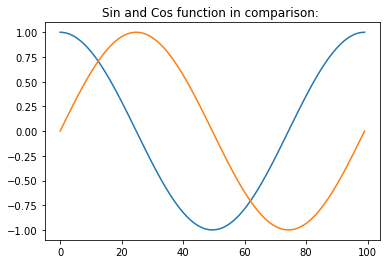

In [5]:
import math
import matplotlib.pyplot as plt
numbers = np.linspace(0, 2*math.pi, num=100)
print("The array created is: \n", numbers, "\n\n")
num_slice = [numbers[i] for i in np.arange(0,100,10)]
print("The array containing every 10th element is: \n", num_slice, "\n\n")
reverse = numbers[::-1]
print("The original array reversed is: \n", reverse)
mask = [abs(math.sin(numbers[i])-math.cos(numbers[i]))<0.1 for i in range(len(numbers))]
sico = numbers[mask]
print("Array made by extracting the elements where the absolute difference between the sin and cos functions evaluated for that element was <0.1: \n", sico, "\n\n")
cos = np.array([math.cos(numbers[i]) for i in range(len(numbers))])
sin = np.array([math.sin(numbers[i]) for i in range(len(numbers))])
plt.title("Sin and Cos function in comparison: ")
plt.plot(cos)
plt.plot(sin)

5\. **Matrices**

Create a matrix that shows the $10 \times 10$ multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [6]:
mat = np.array([(i*j) for i in range(1,11) for j in range(1,11)])
mat = mat.reshape(10,10)
print("The 10x10 multiplication table matrix is: \n", mat)
anti_d = np.fliplr(mat).diagonal()
print("The anti-diagonal vector is: \n", anti_d)
off_mat = np.diagonal(mat, offset=1)
print("The diagonal with the offset of 1 is: \n", off_mat)

The 10x10 multiplication table matrix is: 
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
The anti-diagonal vector is: 
 [10 18 24 28 30 30 28 24 18 10]
The diagonal with the offset of 1 is: 
 [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: `0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448`

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [7]:
distances_x = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distances_y = [distances_x[i] for i in range(1, len(distances_x))]
distances = np.zeros((len(distances_x), len(distances_x)))
distances[0, :] = distances_x
distances[1:, 0] = distances_y
for i in range(1, len(distances_x)):
    for j in range(1, len(distances_x)):
        if (i!=j):
            distances[i,j] = abs(distances_x[i]-distances_x[j])
print("The 2D grid of the distances in miles is: \n", distances, "\n\n")
coeff = float(1.60934)
distances_km = distances*coeff
distances_km[0, :] = distances[0, :]
distances_km[:, 0] = distances[:, 0]
print("The 2D grid of the distances in kilometers instead is: \n", distances_km, )

The 2D grid of the distances in miles is: 
 [[   0.  198.  303.  736.  871. 1175. 1475. 1544. 1913. 2448.]
 [ 198.    0.  105.  538.  673.  977. 1277. 1346. 1715. 2250.]
 [ 303.  105.    0.  433.  568.  872. 1172. 1241. 1610. 2145.]
 [ 736.  538.  433.    0.  135.  439.  739.  808. 1177. 1712.]
 [ 871.  673.  568.  135.    0.  304.  604.  673. 1042. 1577.]
 [1175.  977.  872.  439.  304.    0.  300.  369.  738. 1273.]
 [1475. 1277. 1172.  739.  604.  300.    0.   69.  438.  973.]
 [1544. 1346. 1241.  808.  673.  369.   69.    0.  369.  904.]
 [1913. 1715. 1610. 1177. 1042.  738.  438.  369.    0.  535.]
 [2448. 2250. 2145. 1712. 1577. 1273.  973.  904.  535.    0.]] 


The 2D grid of the distances in kilometers instead is: 
 [[   0.       198.       303.       736.       871.      1175.
  1475.      1544.      1913.      2448.     ]
 [ 198.         0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 303.       168.9807     0.       696.

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Construct a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [8]:
import timeit
#First method (more right as regards the approach)
N = 99
numbers = np.arange(0, N+1)
print(numbers, "\n\n")
mask = np.array([False for i in range(N+1)])
print(mask)
condition = np.array([N+1])
for i in numbers[2:]:
    new_value = numbers[i]
    #print("At iteration ", i, " we have: ", len(condition[new_value%condition == 0]), " and an array: ", condition, " with new value: ", new_value)
    if(len(condition[new_value%condition == 0]) == 0):
        condition = condition.tolist()
        condition.append(new_value)
        condition = np.array(condition)
        mask[i] = True
        #print(new_value)
#print("Raw primes: \n", condition)
condition = condition[1:]
print("The prime numbers are: \n", condition, "\n\n")
print("The new mask is: ", mask, "\n\n")
numbers = numbers[mask]
'''
time = timeit.timeit(stmt=code_to_measure, number=1)
print("The time taken to compute the prime numbers is: ", time)
print("The prime numbers obtained with a mask are: \n", numbers)
'''

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] 


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
The prime numbers are: 
 [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 6

'\ntime = timeit.timeit(stmt=code_to_measure, number=1)\nprint("The time taken to compute the prime numbers is: ", time)\nprint("The prime numbers obtained with a mask are: \n", numbers)\n'

In [9]:
import numpy as np
import timeit
#First method (more right as regards the approach)
N = 99
code_to_measure = '''
numbers = np.arange(0, N+1)
print(numbers)
mask = np.array([False for i in range(N+1)])
print(mask)
condition = np.array([N+1])
for i in numbers[2:]:
    new_value = numbers[i]
    #print("At iteration ", i, " we have: ", len(condition[new_value%condition == 0]), " and an array: ", condition, " with new value: ", new_value)
    if(len(condition[new_value%condition == 0]) == 0):
        condition = condition.tolist()
        condition.append(new_value)
        condition = np.array(condition)
        mask[i] = True
        #print(new_value)
#print("Raw primes:", condition)
condition = condition[1:]
print("The prime numbers are:", condition)
print("The new mask is:", mask)
numbers = numbers[mask]
'''

time = timeit.timeit(stmt=code_to_measure, globals=globals(), number=1)
print("The time taken to compute the prime numbers is:", time)
print("The prime numbers obtained with a mask are:\n", numbers)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
The prime numbers are: [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 

'\nAs we can see from the plot created by computing the code and retrieving the corresponding time of computations, as we increase N \nthe computational time increases exponentially. This is a behaviour that is difficult to see in the beginning, so when N is little, \nhowever when N becomes big enough the pattern becomes recognisable. In our case the value of N were: [99, 99*2, 999, 999*2, 9999, 9999*2, 99999], \nall expressed in the plot using the logaritmic function in order to make it easier to comprehend the graph, and we can see that when \nN reaches the value of N=99999 the complexity of the code is exponential. Therefore the complexity of the method invented is worse than \nthat of the sieve of Eratosthenes, which is just O(Nlog(logN))\n'

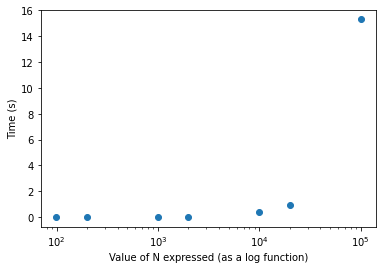

In [10]:
import matplotlib.pyplot as plt
time1 = 0.0028624999977182597
time1_2 = 0.0055346000008285046
time2 = 0.028444099996704608
time2_2 = 0.03662099999928614
time3 = 0.3687361999982386
time3_2 = 0.954739900000277
time4 = 15.301372100002482
plt.scatter([99, 99*2, 999, 999*2, 9999, 9999*2, 99999], [time1, time1_2, time2, time2_2, time3, time3_2, time4])
# plt.xticks([99, 99*2, 999, 999*2, 9999, 9999*2, 99999])
plt.xscale("log")
plt.ylabel('Time (s)')
plt.xlabel('Value of N expressed (as a log function)')
'''
As we can see from the plot created by computing the code and retrieving the corresponding time of computations, as we increase N 
the computational time increases exponentially. This is a behaviour that is difficult to see in the beginning, so when N is little, 
however when N becomes big enough the pattern becomes recognisable. In our case the value of N were: [99, 99*2, 999, 999*2, 9999, 9999*2, 99999], 
all expressed in the plot using the logaritmic function in order to make it easier to comprehend the graph, and we can see that when 
N reaches the value of N=99999 the complexity of the code is exponential. Therefore the complexity of the method invented is worse than 
that of the sieve of Eratosthenes, which is just O(Nlog(logN))
'''

Text(0.5, 1.0, 'Example of a function with complexity O(nlog(logn))')

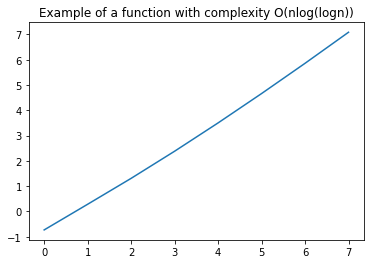

In [11]:
import math
x = np.arange(2, 10)
y = []
for i in x:
    y.append(i*math.log(math.log(i)))
plt.plot(y)
plt.title("Example of a function with complexity O(nlog(logn))")

In [12]:
#Second method, following the instructions. (However it is obtained by almost cheating, as the hypothesis to follow such an approach
#is to already know the prime numbers, at least those contained in [2, 10], which is not specified as a condition in the exercise)
N = 99
numbers = np.arange(0, N+1)
#print(numbers, "\n\n")
mask = np.array([True for i in range(N+1)])
print(mask)
#indices = [i for i in numbers[2:] ]
mask[numbers % 2 == 0] = False
mask[numbers % 3 == 0] = False
mask[numbers % 5 == 0] = False
mask[numbers % 7 == 0] = False
mask[numbers==2], mask[numbers==3], mask[numbers==5], mask[numbers==7] = True, True, True, True
mask[0:2] = False
print("New mask: \n ", mask, "\n\n")
numbers = numbers[mask]
print("Prime numbers: \n", numbers)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
New mask: 
  [False False  True  True False  True False  True False False False  True
 False  True False False False  True False  True False False False  True
 False False False False False  True False  True False False False False
 False  True False False False  True False  True False False False  True
 False False False False False  True False False False False False  True
 False  True

In [13]:
#Third approach, based on the sieve of Eratosthenes
N = 99
numbers = np.arange(0, N+1)
print(numbers)
mask = np.array([True for i in range(N+1)])
mask[numbers % 2 == 0] = False
mask[numbers==2] = True
mask[numbers % 3 == 0] = False
mask[numbers==3] = True
#Number 4 has already been removed as a multiple of 2
mask[numbers % 5 == 0] = False
mask[numbers==5] = True
#Number 6 has already been removed as a multiple of 2 and 3
mask[numbers % 7 == 0] = False
mask[numbers==7] = True
#Number 8,9,10 already removed.
numbers = numbers[mask]
numbers = numbers[1:]
print(numbers)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


In [14]:
a = np.array([1,2,3,4,5,10,15])
a = a.tolist()
a.append(20)
a = np.array(a)
b = a[a%5 == 0]
print(a, b, len(b))

[ 1  2  3  4  5 10 15 20] [ 5 10 15 20] 4


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

In [21]:
import random
#Seed set just to test that the code performs as it should
random.seed(0)
walkers = np.arange(1001)
steps = np.arange(201)
path = np.zeros((len(walkers), len(steps)))
path[:, 0] = walkers
path[0, :] = steps
# print(path)
exclude = [0]
for i in range(1, len(steps)):
    for j in range(1, len(walkers)):
        #It does not check the value of the randint: it can't be 0!
        '''
        new_value = random.randint(-1, 1)
        if (new_value != 0):
            path[i,j] = new_value
            print(i, j, " Value inserted: ", path[i,j])
        else:
            ''
        '''
        new_value = random.randint(-1, 1)
        while(new_value in exclude):
            new_value = random.randint(-1, 1)
        path[j, i] = new_value
#         print(j, i, " Value inserted: ", path[j, i])
print(path)
distance_walk = np.arange(1001)
sum = 0
for j in range(1, len(walkers)):
    sum_j = 0
    for i in range(1, len(steps)):
        sum_j += path[j,i]
    distance_walk[j] = sum_j
distance_walk = distance_walk[1:]
for i in range(len(distance_walk)):
    distance_walk[i] = distance_walk[i]**2
print(distance_walk)
# distances = np.arange(201)
distances = []
for i in range(1, len(steps)):
    sum_i = 0
    for j in range(1, len(walkers)):
        sum_i += path[j, i]
#     print(sum_i, len(walkers), sum_i/len(walkers))
#     distances[i] = sum_i/len(walkers)
    distances.append(sum_i/len(walkers))
#     print("distances[", i, "]=", distances[i])
# distances = distances[1:]
print(distances)

[[   0.    1.    2. ...  198.  199.  200.]
 [   1.   -1.   -1. ...    1.   -1.   -1.]
 [   2.    1.   -1. ...   -1.   -1.    1.]
 ...
 [ 998.   -1.    1. ...    1.   -1.    1.]
 [ 999.   -1.    1. ...    1.    1.    1.]
 [1000.    1.    1. ...    1.    1.   -1.]]
[  64  144   16   16  784   36  256  256  256   64    4  196  676    4
  196   64    0  100  144  576  400   64  784   64   36   36   36   64
    0  400    4 1024  100  400   36  324    4  100  256  144   16    0
   16  256  676   64  100    4   64    4   36  576 1600   64   16   36
   64  144  100    4  100    4    4  144   16   64  100    4   64   64
    4    4  784  256  144  484    0  256    4  256  196  900  100  196
  400  144  144 2704  196   36  144  196  144   16   16  144  256   36
   36   16   64    4  900   36   36  144  196  196   36   16  100  100
  100   36   16   64  784   16  324    4   64    0   16  100   64   64
  676  144  196   36   64    0    4    4   16  100   64  784   64    4
   36   16    4   16   36 